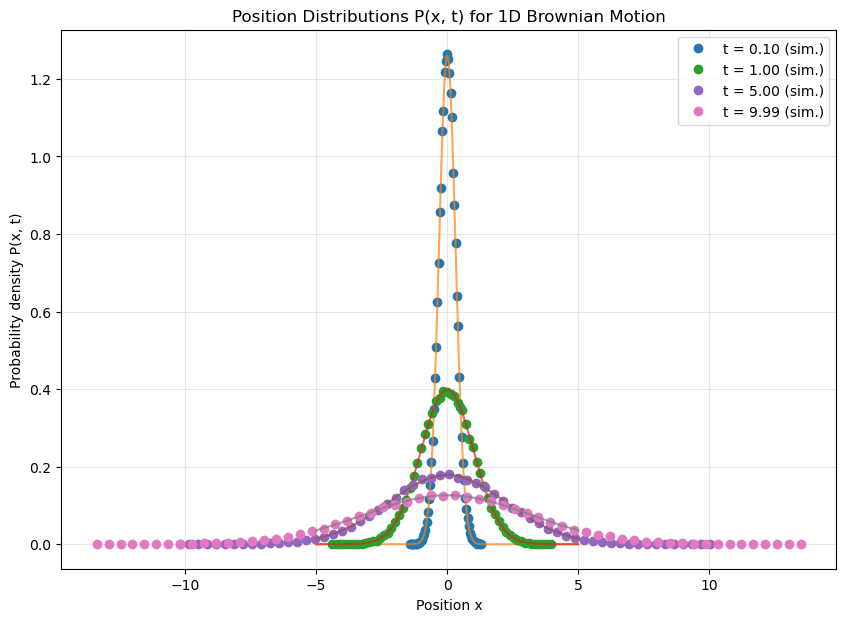

In [2]:
# -*- coding: utf-8 -*-
"""
1D_Brownian_Motion_Distribution.ipynb

Brownian Motion Simulation (1D) — Step 2: Position Distribution
---------------------------------------------------------------
Author: Petros Agridos
Description:
This notebook extends the 1D Brownian motion simulation to analyze
the probability distribution P(x, t) at different times and compare
it to Einstein's theoretical Gaussian distribution.
"""

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Parameters
N_particles = 100000   # large number for good statistics
N_steps = 1000
dt = 1e-2
D = 0.5
sigma = np.sqrt(2 * D * dt)

# Simulation
positions = np.zeros((N_particles, N_steps))
for i in range(1, N_steps):
    steps = np.random.normal(0, sigma, N_particles)
    positions[:, i] = positions[:, i - 1] + steps

time = np.arange(N_steps) * dt

# Select time snapshots to analyze
snapshots = [10, 100, 500, 999]

# Plot distributions
plt.figure(figsize=(10, 7))
x_vals = np.linspace(-5, 5, 300)

for t_idx in snapshots:
    t_val = time[t_idx]
    # Extract particle positions at this time
    x_data = positions[:, t_idx]
    
    # Histogram normalized to form probability density
    hist, bins = np.histogram(x_data, bins=60, density=True)
    centers = 0.5 * (bins[:-1] + bins[1:])
    
    # Theoretical Gaussian PDF from Einstein
    theory = norm.pdf(x_vals, loc=0, scale=np.sqrt(2 * D * t_val))
    
    plt.plot(centers, hist, 'o', label=f"t = {t_val:.2f} (sim.)")
    plt.plot(x_vals, theory, '-', alpha=0.7)

plt.title("Position Distributions P(x, t) for 1D Brownian Motion")
plt.xlabel("Position x")
plt.ylabel("Probability density P(x, t)")
plt.legend()
plt.grid(alpha=0.3)
plt.show()
